In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
dataframe = pd.read_csv('bodyfat.csv')
dataframe.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
dataframe.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [ ]:
dataframe.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


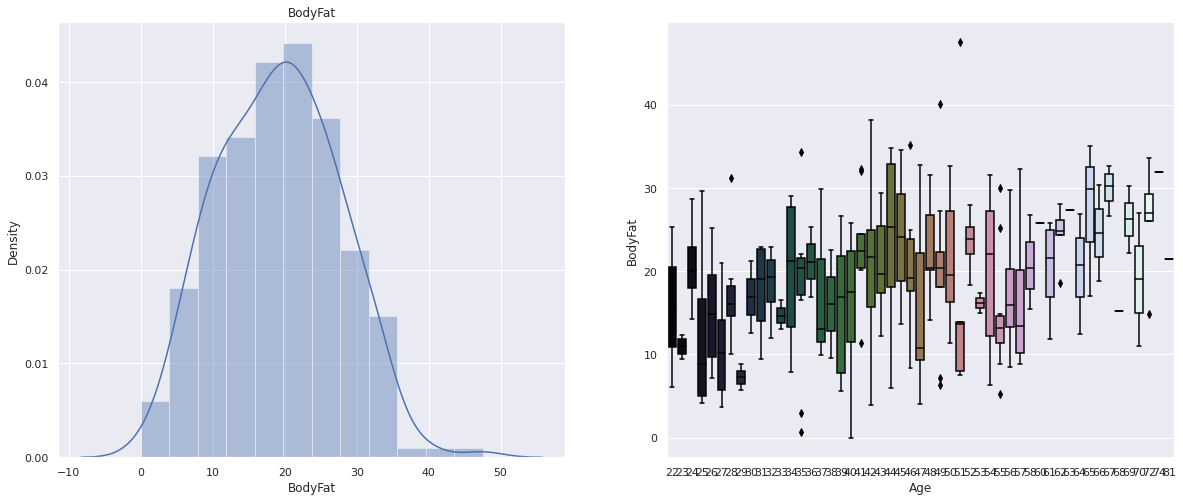

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('BodyFat')
sns.distplot(dataframe.BodyFat)

plt.subplot(1,2,2)
sns.boxplot(x=dataframe.Age, y=dataframe.BodyFat, palette=("cubehelix"))


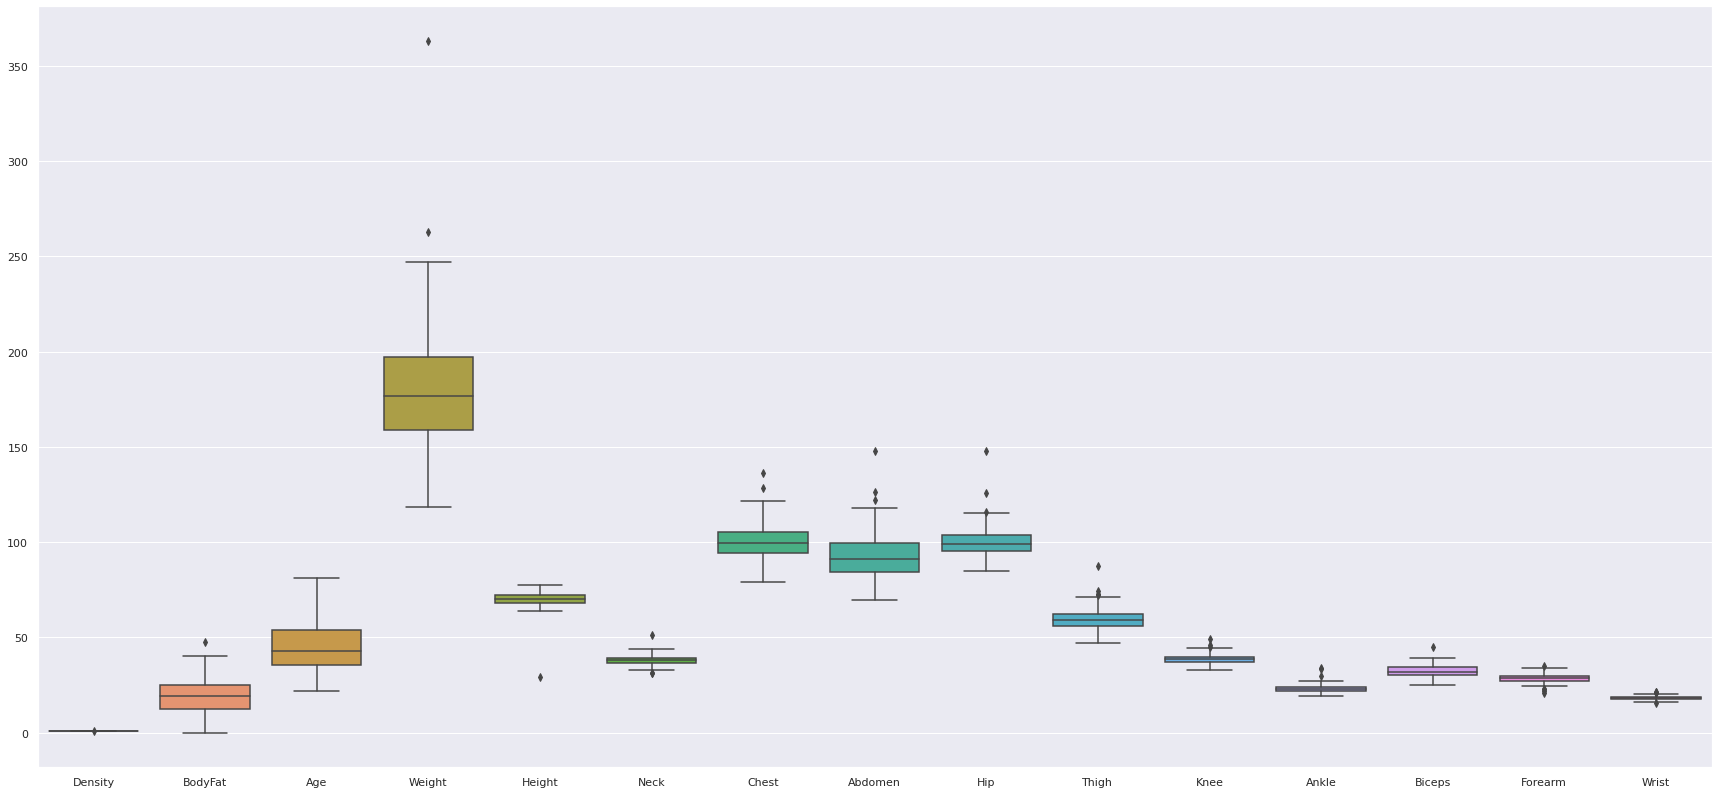

In [ ]:
plt.figure(figsize=(30,14))
sns.boxplot(data=dataframe)
plt.show()

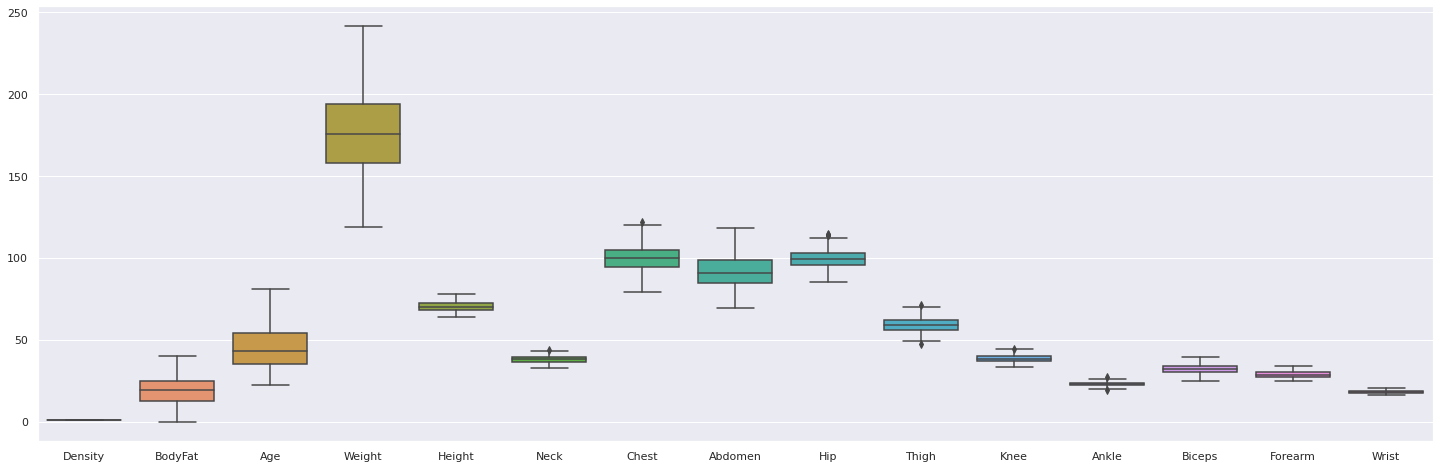

In [ ]:
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3 - Q1

data = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) |(dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(25,8))
sns.boxplot(data=data)
plt.show()

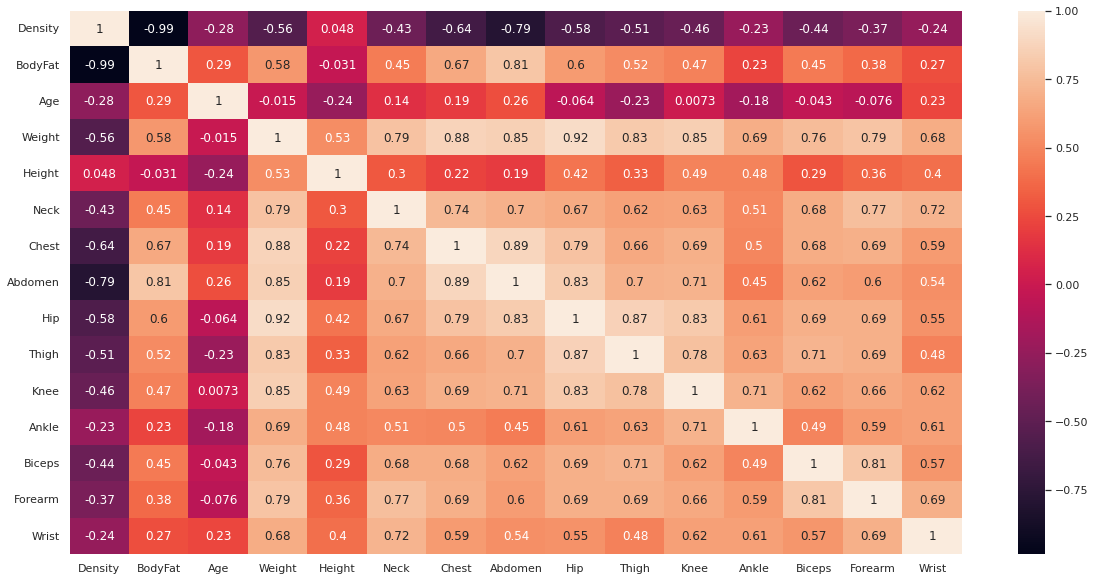

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
data.drop(columns=['Wrist','Ankle','Neck','Knee','Forearm'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#sns.pairplot(data)

**Building Model**

In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [ ]:
y = data ['BodyFat']
x = data[["Density", "Age", "Weight", "Height", "Chest", "Abdomen", "Hip", "Thigh", "Biceps"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
inputs_scaled = scaler.transform(x)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, y, test_size=0.2, random_state=42)

In [ ]:
build_model(x_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     634.4
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.12e-129
Time:                        02:24:12   Log-Likelihood:                -324.21
No. Observations:                 187   AIC:                             668.4
Df Residuals:                     177   BIC:                             700.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5987      0.103    180.170      0.0

array([[ 1.        ,  0.10691234,  0.09187156, ...,  0.12653122,
         0.3694911 ,  1.23941127],
       [ 1.        , -0.10397154, -0.78397066, ...,  0.9020689 ,
         1.28171385,  1.5250771 ],
       [ 1.        ,  1.07253852, -1.3413248 , ...,  0.55738549,
         0.39174044, -0.1889179 ],
       ...,
       [ 1.        , -0.46469396,  0.17149358, ...,  0.76419553,
         0.81447781,  1.13228658],
       [ 1.        ,  0.31224664, -0.22661652, ...,  0.59185383,
         0.34724177,  0.6680796 ],
       [ 1.        , -0.16501687, -0.1469945 , ...,  0.00589202,
         0.63648313,  0.418122  ]])

In [ ]:
new_x=[]
for i in [0,1,3,4,8]:
    new_x.append(list(x.columns)[i])
new_data=x[new_x]

In [ ]:
scaler = StandardScaler()
scaler.fit(new_data)
inputs_scaled = scaler.transform(new_data)
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, y, test_size=0.2, random_state=42)

In [ ]:
build_model(x_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1147.
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          5.81e-135
Time:                        02:24:12   Log-Likelihood:                -325.87
No. Observations:                 187   AIC:                             663.7
Df Residuals:                     181   BIC:                             683.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5987      0.103    180.930      0.0

array([[ 1.        ,  0.10691234,  0.09187156, -1.28269753,  0.09930953,
         1.23941127],
       [ 1.        , -0.10397154, -0.78397066,  1.34593789,  0.95657287,
         1.5250771 ],
       [ 1.        ,  1.07253852, -1.3413248 ,  0.76179668, -0.23040713,
        -0.1889179 ],
       ...,
       [ 1.        , -0.46469396,  0.17149358,  0.66443982,  0.95657287,
         1.13228658],
       [ 1.        ,  0.31224664, -0.22661652,  0.08029861,  0.61366753,
         0.6680796 ],
       [ 1.        , -0.16501687, -0.1469945 , -0.69855633, -0.5205578 ,
         0.418122  ]])

**Heteroscedasticity**

In [ ]:
lm = sm.OLS(y_train,x_train).fit()
y_pred=lm.predict(x_train)
residuals=y_train-y_pred
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 0.9969812904278715), ('p-value', 0.5054969370501587)]

**Linear Model**

In [ ]:
y = data ['BodyFat']
x_poly = data.drop(['BodyFat'],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

In [ ]:
def build_polymodel(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(x)

In [ ]:
build_polymodel(X_poly,y)

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     350.3
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.19e-156
Time:                        02:24:12   Log-Likelihood:                -268.84
No. Observations:                 234   AIC:                             647.7
Df Residuals:                     179   BIC:                             837.7
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3706.8524    913.989      4.056      0.0

array([[1.00000e+00, 1.07080e+00, 2.30000e+01, ..., 3.48100e+03,
        1.88800e+03, 1.02400e+03],
       [1.00000e+00, 1.08530e+00, 2.20000e+01, ..., 3.44569e+03,
        1.79035e+03, 9.30250e+02],
       [1.00000e+00, 1.04140e+00, 2.20000e+01, ..., 3.55216e+03,
        1.71648e+03, 8.29440e+02],
       ...,
       [1.00000e+00, 1.02360e+00, 7.20000e+01, ..., 3.55216e+03,
        2.09792e+03, 1.23904e+03],
       [1.00000e+00, 1.03280e+00, 7.20000e+01, ..., 3.63609e+03,
        1.88739e+03, 9.79690e+02],
       [1.00000e+00, 1.03990e+00, 7.20000e+01, ..., 3.13600e+03,
        1.70800e+03, 9.30250e+02]])

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(y_train, y_pred)
MSE = mean_squared_error(y_train, y_pred)
print('Mean absolute error' ,MAE)
print('Mean squared error' ,MSE)

Mean absolute error 18.57835198505404
Mean squared error 347.4436822151513


**Random Forest Model**

In [ ]:
y

0      12.3
1       6.1
2      25.3
3      10.4
4      28.7
       ... 
246    30.2
247    11.0
248    33.6
249    29.3
250    26.0
Name: BodyFat, Length: 234, dtype: float64

In [ ]:
x

,Density,Age,Weight,Height,Chest,Abdomen,Hip,Thigh,Biceps
0,1.0708,23,154.25,67.75,93.1,85.2,94.5,59.0,32.0
1,1.0853,22,173.25,72.25,93.6,83.0,98.7,58.7,30.5
2,1.0414,22,154.00,66.25,95.8,87.9,99.2,59.6,28.8
3,1.0751,26,184.75,72.25,101.8,86.4,101.2,60.1,32.4
4,1.0340,24,184.25,71.25,97.3,100.0,101.9,63.2,32.2
...,...,...,...,...,...,...,...,...,...
246,1.0308,69,215.50,70.50,113.7,107.6,110.0,63.3,37.5
247,1.0736,70,134.25,67.00,89.2,83.6,88.8,49.6,25.6
248,1.0236,72,201.00,69.75,108.5,105.0,104.5,59.6,35.2
249,1.0328,72,186.75,66.00,111.1,111.5,101.7,60.3,31.3


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.metrics import r2_score, accuracy_score
y_pred=regressor.predict(x_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_mae = mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print('Mean Squared Error', lin_mse.round(2))
print('Mean Absolute Error', lin_mae.round(2))
print('R squared', r2)

Mean Squared Error 1.88
Mean Absolute Error 0.46
R squared 0.9688740071076


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

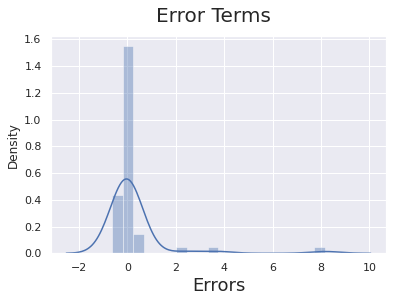

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

Saving Model

In [ ]:
import pickle

In [ ]:
with open('bodyfat_model.pkl', 'wb') as r:
  pickle.dump(regressor,r)

In [ ]:
with open('bodyfat_model.pkl', 'rb') as r:
  knnp = pickle.load(r)

In [ ]:
y_pred = knnp.predict(x_test)
round(r2_score(y_test,y_pred), 3)

0.969